In [1]:
cd D:/Downloads/

[WinError 2] The system cannot find the file specified: 'D:/Downloads/'
C:\Users\ryans\Downloads


In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

C:\Users\ryans\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ryans\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ryans\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


# Data

In [4]:
labelled_data = pd.read_excel('tagged1000.xlsx')
unlabelled_data = pd.read_excel('osha.xlsx', names=['id','title','summary','newkeys','report'], header=None)

In [5]:
labelled_data.head()

,Unnamed: 0,id,title,Summary2,cause,newkeys,title.new,summary.new,Tagged2
0,0,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of Templ...,Other,"\nconstruction, undrgrd power line, highway, ...",two workers are struck by motor vehicle and o...,On august 27 2013 employees #1 and #2 of templ...,traffic
1,1,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 Empl...,[],"\nconstruction, equipment operator, industria...",foreman is fatally crushed when forklift tips...,At approximately 6:30 a.m. on may 13 2013 empl...,collapse of object
2,2,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing vin...,Fall from/with ladder,"\ninstalling, ladder, scaffold, structure mov...",employee suffers abdominal fracture in fall f...,On april 9 2013 employee #1 was installing vin...,falls
3,3,201562840,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operating ...,Crushed/run,"\nasphalt, machine operator, caught by, cloth...",employee's body is caught in asphalt machine ...,On november 27 2012 employee #1 was operating ...,caught in/between objects
4,4,202478632,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 20...,Other,"\nslip, nail, puncture, abdomen, fall\n",employee is punctured in abdomen with nail,At approximately 11:57 a.m. on september 28 20...,struck by moving objects


In [6]:
unlabelled_data.head()

,id,title,summary,newkeys,report
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...,
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen,
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...,1 317290559 Fatality Other Occupation not re...
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,waste proc fac industrial truck struck b...,
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,truck driver pump tank hot water struc...,


# Preprocessing-1

In [7]:
# lowered summary sentences
lsumm = labelled_data.Summary2.str.lower()
ulsumm = unlabelled_data.summary.str.lower()

In [8]:
# tokensized sentences
lsumm_tokens = lsumm.apply(nltk.word_tokenize)
ulsumm_tokens = ulsumm.apply(nltk.word_tokenize)

In [9]:
from nltk.corpus import stopwords

In [10]:
# removed stop words
stop_words = set(stopwords.words('english'))

lsumm_tokens = lsumm_tokens.apply(lambda d: [w for w in d if not w in stop_words])
ulsumm_tokens = ulsumm_tokens.apply(lambda d: [w for w in d if not w in stop_words])

# Word Embeddings

In [11]:
# Importing word embeddings and Creating Embedding Matrix
embedding_dict = {}
with open('glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        embedding_dict[values[0]] = np.asarray(values[1:], dtype=np.float32)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from scipy import spatial
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
nltk.download('udhr')
nltk.download('treebank')
nltk.download('large_grammars')

[nltk_data] Downloading package udhr to C:\Users\GEETHA
[nltk_data]     PARDHEEV\AppData\Roaming\nltk_data...
[nltk_data]   Package udhr is already up-to-date!
[nltk_data] Downloading package treebank to C:\Users\GEETHA
[nltk_data]     PARDHEEV\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package large_grammars to C:\Users\GEETHA
[nltk_data]     PARDHEEV\AppData\Roaming\nltk_data...
[nltk_data]   Package large_grammars is already up-to-date!


True

In [13]:
# for checking functioning of word embeddings by finding closest embedding
def find_closest_embedding(embedding):
    return sorted(embedding_dict.keys(), key=lambda word: spatial.distance.euclidean(embedding_dict[word], embedding))

In [14]:
print(find_closest_embedding(
    embedding_dict["twig"] - embedding_dict["branch"] + embedding_dict["hand"])[:5])

['twig', 'hand', 'cupping', 'fingers', 'paddles']


In [15]:
# Visualizing embeddings using TSNE
tsne = TSNE(n_components=2, random_state=0)

In [16]:
words = list(embedding_dict.keys())
vectors = [embedding_dict[word] for word in words]

In [17]:
Y = tsne.fit_transform(vectors[:100])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  This is separate from the ipykernel package so we can avoid doing imports until


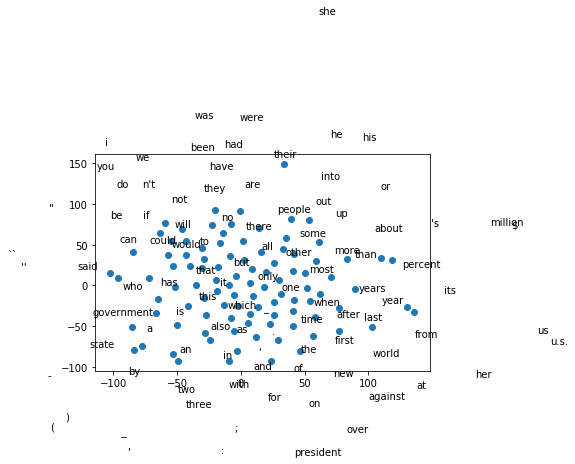

In [18]:
plt.scatter(Y[:,0],Y[:,1])
for label,x,y in zip(words, Y[:,0], Y[:,1]):
    plt.annotate(label, xy=(x,y), textcoords='offset points')

In [19]:
# Visualizing embeddings using PCA
pca = PCA(n_components=2, random_state=0)

In [20]:
y = pca.fit_transform(vectors[:20])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  This is separate from the ipykernel package so we can avoid doing imports until


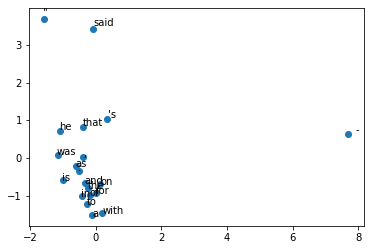

In [21]:
plt.scatter(y[:,0],y[:,1])
for label,x,y1 in zip(words, y[:,0], y[:,1]):
    plt.annotate(label, xy=(x,y1), textcoords='offset points')

# Preprocessing-2

In [22]:
# Removing all non alphabet characters
ulsumm_tokens = ulsumm_tokens.apply(lambda d: [w for w in d if w.isalpha()])

In [23]:
# Pos tagging
lsumm_pos = lsumm_tokens.apply(nltk.pos_tag)
ulsumm_pos = ulsumm_tokens.apply(nltk.pos_tag)

In [24]:
lsumm_pos = lsumm_pos.apply(lambda d: [w for w in d if w[0].isalpha()])

In [25]:
udhr = nltk.corpus.udhr.words('English-Latin1')

In [26]:
WNlemma = nltk.WordNetLemmatizer()

In [27]:
# Lemmatizing
lsumm_pos_lem = lsumm_pos.apply(lambda d: [(WNlemma.lemmatize(w[0]), w[1]) for w in d]) 
ulsumm_pos_lem = ulsumm_pos.apply(lambda d: [(WNlemma.lemmatize(w[0]), w[1]) for w in d])

In [28]:
# Combining words with pos tags
def concat(d):
    free=[]
    for w in d:
        free.append(w[0]+'/'+w[1])
    return free
lsumm_final = lsumm_pos_lem.apply(concat)
ulsumm_final = ulsumm_pos_lem.apply(concat)

In [29]:
# Finally combing words in sentences for training
def words2sent(d):
    sent = ' '.join([w[0] for w in d])
    return sent
lsents_final = lsumm_pos_lem.apply(words2sent)
usents_final = ulsumm_pos_lem.apply(words2sent)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tensorflow.keras.preprocessing import text, sequence

In [31]:
# Indexing words
token1 = text.Tokenizer()
token1.fit_on_texts(lsents_final)
word_index1 = token1.word_index

In [32]:
token2 = text.Tokenizer()
token2.fit_on_texts(usents_final)
word_index2 = token2.word_index

In [33]:
print('labelled data words:',format(len(word_index1)))
print('ulabelled data words:',format(len(word_index2)))

labelled data words: 5541
ulabelled data words: 20269


In [34]:
len(nltk.word_tokenize(lsents_final[0]))

63

In [35]:
k = usents_final.str.split()
k = k.str.len()
len(k[k<200])

16111

In [36]:
k = usents_final.str.split()
max(k.str.len()) # length of largest final sentence

368

In [37]:
# Text to sequences
# We should use unlabelled word index for texts_to_sequences as they contain large set of words.
# Every same word in both labelled and unlabelled final sentences should have same index that 
# is why for both texts to sequences token2 tokenizer used. 
utrain_seq = sequence.pad_sequences(token2.texts_to_sequences(usents_final), padding='post', maxlen=200)
ltrain_seq = sequence.pad_sequences(token2.texts_to_sequences(lsents_final), padding='post', maxlen=200)

In [38]:
# Same length for all sequences 368
print(ltrain_seq.shape)
print(utrain_seq.shape)

(1000, 200)
(16323, 200)


# Creating Embedding Matrix with preprocessed data

In [39]:
embedding_matrix = np.zeros((len(word_index2)+1, 300))
for word,i in word_index2.items():
    embedding_vec = embedding_dict.get(word)
    if embedding_vec is not None:
        embedding_matrix[i] = embedding_vec

In [40]:
embedding_matrix.shape

(20270, 300)

# Extracting noun and verb phrases from title

In [41]:
ltitle = labelled_data.title.str.lower()
ltitle_tokens = ltitle.apply(lambda d: nltk.word_tokenize(str(d)))

In [42]:
ultitle = unlabelled_data.title.str.lower()

In [43]:
ltitle_pos = ltitle_tokens.apply(lambda d: nltk.pos_tag(d))

In [44]:
from textblob import TextBlob
import textacy,en_core_web_sm
import operator

In [45]:
# Extracting Noun phrases using textacy library
def extract_TNP(d):
    doc = textacy.make_spacy_doc(d,lang='en_core_web_sm')
    ne=[]
    for chunk in doc.noun_chunks:
        for w in chunk:
            ne.append(str(w))
    return ne
ltitle_TNP = ltitle.apply(lambda d: extract_TNP(str(d)))

In [46]:
# Extracting verb phrases using textacy library
def extract_TVP(sent):
    pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV', 'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]
    doc = textacy.make_spacy_doc(sent,lang='en_core_web_sm')
    verb_phrases = textacy.extract.matches(doc, pattern)
    ne = []
    for chunk in verb_phrases:
        for w in chunk:
            ne.append(str(w))
    return list(set(ne))

In [47]:
# Extracting noun phrases by creating own grammar
def extract_NP(sent):
    grammar = r"""NP: {<DT>?<IN>+<JJ>*<NN.*>+}
              NP: {<WRB>+<JJ>*<NN.*>+}"""
    chunker = nltk.RegexpParser(grammar)
    ne = []
    chunk = chunker.parse(nltk.pos_tag([WNlemma.lemmatize(w.lower()) for w in nltk.word_tokenize(str(sent))]))
    for tree in chunk.subtrees(filter=lambda t: t.label() == 'NP'):
        for child in tree.leaves():
            ne.append(child[0])
    return ne

In [48]:
# Extracting verb phrases by creating own grammar
def extract_VP(sent):
    grammar = r"""VP: {<V.*>?<RB.*>*<V.*>+}"""
    chunker = nltk.RegexpParser(grammar)
    ne = []
    chunk = chunker.parse(nltk.pos_tag([WNlemma.lemmatize(w.lower()) for w in nltk.word_tokenize(sent)]))
    for tree in chunk.subtrees(filter=lambda t: t.label() == 'VP'):
        for child in tree.leaves():
            ne.append(child[0])
    return ne

In [199]:
# For Noun Phrases extract_NP working better than extract_TNP
ltitle_NP = ltitle.apply(extract_NP)
ultitle_NP = ultitle.apply(extract_NP)
# For Verb Phrases extract_TVP working better than extract_VP
ltitle_VP = ltitle.apply(lambda d: extract_TVP(str(d)))
ultitle_VP = ultitle.apply(lambda d: extract_TVP(str(d)))

In [50]:
# Creating sorted dictionary of number of times noun phrases appeared in whole dataset
def all_NP(lt):
    np = []
    for li in lt:
        for w in li:
            np.append(w)
    return np
labelled_allnp = all_NP(ltitle_NP)
#unlabelled_allnp = all_NP(ultitle_NP)
lunique_np = []
uunique_np = []
for w in labelled_allnp:
    if w not in lunique_np:
        lunique_np.append(w)
#for w in unlabelled_allnp:
#    if w not in uunique_np:
#        uunique_np.append(w)
lnpdic = {}
unpdic = {}
for w in lunique_np:
    lnpdic[w] = labelled_allnp.count(w)
for w in uunique_np:
    unpdic[w] = unlabelled_allnp.count(w)
lnpdic_sorted = dict(sorted(lnpdic.items(), key=operator.itemgetter(1), reverse=True))
#unpdic_sorted = dict(sorted(unpdic.items(), key=operator.itemgetter(1), reverse=True))

In [110]:
lnpdic_sorted

{'in': 312,
 'fall': 220,
 'from': 215,
 'by': 184,
 'when': 122,
 'roof': 48,
 'ladder': 38,
 'of': 32,
 'collapse': 30,
 'trench': 27,
 'truck': 26,
 'scaffold': 26,
 'on': 25,
 'lift': 23,
 'with': 21,
 'between': 21,
 'boom': 21,
 'backhoe': 21,
 'through': 18,
 'tower': 17,
 'bridge': 17,
 'steel': 16,
 'crane': 15,
 'into': 15,
 'bucket': 15,
 'flash': 13,
 'during': 12,
 'aerial': 12,
 'saw': 12,
 'work': 12,
 'arc': 12,
 'contact': 12,
 'machine': 11,
 'concrete': 11,
 'explosion': 11,
 'at': 11,
 'fire': 11,
 'power': 11,
 'vehicle': 10,
 'line': 10,
 'pipe': 10,
 'opening': 10,
 'after': 9,
 'caught': 9,
 'cable': 9,
 'floor': 9,
 'beam': 9,
 'electrical': 9,
 'hot': 8,
 'gas': 8,
 'struck': 8,
 'platform': 7,
 'excavator': 7,
 'elevation': 7,
 'head': 7,
 'shock': 7,
 'tip': 6,
 'exposure': 6,
 'vapor': 6,
 'shaft': 6,
 'construction': 6,
 'while': 6,
 'communication': 6,
 'unsecured': 6,
 'metal': 6,
 'carbon': 6,
 'monoxide': 6,
 'over': 6,
 'dump': 6,
 'excavation': 6,
 '

In [52]:
# Taking words from labels of data
labels = []
for w in labelled_data.Tagged2.unique():
    labels.append(WNlemma.lemmatize(w.split()[0]))
labels = list(set(labels))
labels.append(['object','chemical','explosion'])
labels

['struck',
 'collapse',
 'exposure',
 'caught',
 'fall',
 'fire',
 'others',
 'electrocution',
 'traffic',
 ['object', 'chemical', 'explosion']]

In [53]:
labelled_data.Tagged2.unique()

array(['traffic', 'collapse of object', 'falls',
       'caught in/between objects', 'struck by moving objects', 'others',
       'exposure to chemical substances', 'fires and explosion',
       'electrocution', 'struck by falling object',
       'exposure to extreme temperatures'], dtype=object)

# Creating new data sets with extracted features

In [54]:
#unlabelled_new = pd.DataFrame(pd.concat([unlabelled_data.title, unlabelled_data.summary, ultitle_NP, ultitle_VP], axis=1))
labelled_new = pd.DataFrame(pd.concat([labelled_data.title, labelled_data.Summary2, ltitle_NP, ltitle_VP], axis=1))

In [55]:
#unlabelled_new.columns = ['title', 'summary', 'noun_phrases', 'verb_phrases']
labelled_new.columns = ['title', 'summary', 'noun_phrases', 'verb_phrases']
labelled_new.head()

,title,summary,noun_phrases,verb_phrases
0,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of Templ...,"[by, motor, vehicle]","[struck, killed]"
1,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 Empl...,"[when, forklift, tip]","[fatally, crushed]"
2,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing vin...,"[in, fall, from, ladder]",[suffers]
3,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operating ...,"[in, asphalt, machine, dy]","[dies, caught]"
4,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 20...,"[in, abdomen, with, nail]",[punctured]


In [56]:
# Vectorizing noun phrases
def np2vec(nps):
    ne=[]
    for n in nps:
        if n in word_index2.keys():
            ne.append(word_index2[n])
    if len(ne)<7:
        for i in range(7-len(ne)):
            ne.append(0)
    return np.array(ne)

In [57]:
# Vectorizing verb phrases
def vp2vec(vp):
    ne=[]
    for v in vp:
        if v in word_index2.keys():
            ne.append(word_index2[v])
    if len(ne)<5:
        for i in range(5-len(ne)):
            ne.append(0)
    return np.array(ne)

In [58]:
labelled_new['np_vec'] = labelled_new.noun_phrases.apply(np2vec)
#unlabelled_new['np_vec'] = unlabelled_new.noun_phrases.apply(np2vec)

In [59]:
labelled_new['vp_vec'] = labelled_new.verb_phrases.apply(vp2vec)
#unlabelled_new['vp_vec'] = unlabelled_new.verb_phrases.apply(vp2vec)

In [60]:
# To find the maximum length of noun phrases vector
print(labelled_new.vp_vec.str.len().max())
#print(unlabelled_new.vp_vec.str.len().max())

5


In [61]:
# To find the maximum length of noun phrases vector
print(labelled_new.np_vec.str.len().max())
#print(unlabelled_new.np_vec.str.len().max())

7


In [62]:
labelled_new.head()

,title,summary,noun_phrases,verb_phrases,np_vec,vp_vec
0,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of Templ...,"[by, motor, vehicle]","[struck, killed]","[322, 120, 0, 0, 0, 0, 0]","[30, 49, 0, 0, 0]"
1,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 Empl...,"[when, forklift, tip]","[fatally, crushed]","[69, 337, 0, 0, 0, 0, 0]","[1595, 210, 0, 0, 0]"
2,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing vin...,"[in, fall, from, ladder]",[suffers],"[1858, 67, 50, 0, 0, 0, 0]","[12028, 0, 0, 0, 0]"
3,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operating ...,"[in, asphalt, machine, dy]","[dies, caught]","[1858, 565, 11, 1518, 0, 0, 0]","[63, 0, 0, 0, 0]"
4,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 20...,"[in, abdomen, with, nail]",[punctured],"[1858, 1217, 750, 0, 0, 0, 0]","[1487, 0, 0, 0, 0]"


In [63]:
labelled_new.np_vec[0]

array([322, 120,   0,   0,   0,   0,   0])

# Model Building

In [64]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

In [65]:
y = LabelEncoder().fit_transform(labelled_data.Tagged2.values)

In [66]:
res = []
for p,q,r in zip(labelled_new.np_vec, labelled_new.vp_vec, ltrain_seq):
    res.append(np.array(list(p)+list(q)+list(r)))
ltrain_seq = np.array(res)
res1 = []
#for p,q,r in zip(unlabelled_new.np_vec, unlabelled_new.vp_vec, utrain_seq):
#    res1.append(np.array(list(p)+list(q)+list(r)))
#utrain_seq = np.array(res1)
ltrain_seq.shape

(1000, 212)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
X_train, X_test, y_train, y_test = train_test_split(ltrain_seq, y, test_size=0.2)

In [69]:
X_train.shape

(800, 212)

# Model-1 is basic just to check our preprocessed data performance

In [70]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index2)+1, 300, input_length=212, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Convolution1D(30, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [71]:
lr_decay = tf.keras.optimizers.schedules.InverseTimeDecay(0.001, 100, 0.2)
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])  

In [72]:
model1.fit(X_train, y_train, epochs=10)

Train on 800 samples
Epoch 1/10
800/800 [==============================] - 2s 2ms/sample - loss: 2.7546 - accuracy: 0.1437
Epoch 2/10
800/800 [==============================] - 1s 694us/sample - loss: 1.9459 - accuracy: 0.3275
Epoch 3/10
800/800 [==============================] - 1s 709us/sample - loss: 1.6394 - accuracy: 0.4450
Epoch 4/10
800/800 [==============================] - 1s 742us/sample - loss: 1.4669 - accuracy: 0.5200
Epoch 5/10
800/800 [==============================] - 1s 683us/sample - loss: 1.3177 - accuracy: 0.5775
Epoch 6/10
800/800 [==============================] - 1s 699us/sample - loss: 1.2076 - accuracy: 0.6325
Epoch 7/10
800/800 [==============================] - 1s 688us/sample - loss: 1.1167 - accuracy: 0.6662
Epoch 8/10
800/800 [==============================] - 1s 696us/sample - loss: 1.0801 - accuracy: 0.6787
Epoch 9/10
800/800 [==============================] - 1s 704us/sample - loss: 0.9491 - accuracy: 0.7475
Epoch 10/10
800/800 [========================

In [73]:
a,b = model1.evaluate(X_test, y_test)

200/200 [==============================] - 0s 634us/sample - loss: 1.3108 - accuracy: 0.5300


In [74]:
predic = model1.predict(X_test)
predic1 = []
for p in predic:
    predic1.append(np.argmax(p))
predic1 = np.array(predic1)
predic1.shape

(200,)

In [75]:
from sklearn.metrics import f1_score,accuracy_score

In [76]:
f1_score(y_test, predic1, average='weighted')

0.49020726528363456

# Model-2 contains attention layer and is advanced

In [77]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

In [78]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer=tf.keras.initializers.glorot_uniform)
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [96]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index2)+1, 300, input_length=212, weights=[embedding_matrix], trainable=False),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(30, 5, activation='relu'),
    tf.keras.layers.MaxPool1D(),
    tf.keras.layers.LSTM(30, return_sequences=True, recurrent_dropout=0.3, dropout=0.2),
    attention(),
    tf.keras.layers.Dense(11, activation=tf.keras.activations.softmax)
])

In [97]:
lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(0.001, 500, 0.2, staircase=True)
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_decay), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [107]:
# 23+3 total 26 epochs are trained
history = model2.fit(ltrain_seq, y, validation_split=0.3, epochs=1)

Train on 700 samples, validate on 300 samples
700/700 [==============================] - 4s 5ms/sample - loss: 0.7423 - accuracy: 0.7686 - val_loss: 0.9000 - val_accuracy: 0.7100


In [108]:
pred = model2.predict(ltrain_seq)
pred1 = []
for p in pred:
    pred1.append(np.argmax(p))
pred1 = np.array(pred1)
pred1.shape

(1000,)

In [109]:
print('accuracy is: ', accuracy_score(y, pred1))
print('weighted f1_score is: ', f1_score(y, pred1, average='weighted'))

accuracy is:  0.83
weighted f1_score is:  0.8135538438583003


In [91]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

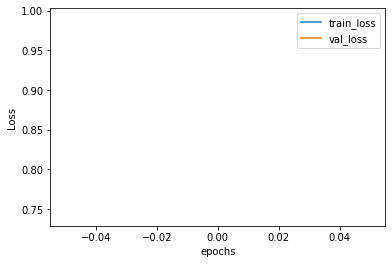

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

In [239]:
from tensorflow.keras import layers
from tensorflow import keras

In [246]:
class Position_Embedding(Layer):
    
    def __init__(self, size=None, mode='sum', **kwargs):
        self.size = size
        self.mode = mode
        super(Position_Embedding, self).__init__(**kwargs)
        
    def call(self, x):
        if (self.size == None) or (self.mode == 'sum'):
            self.size = int(x.shape[-1])
        batch_size,seq_len = K.shape(x)[0],K.shape(x)[1]
        position_j = 1. / K.pow(10000., \
                                 2 * K.arange(self.size / 2, dtype='float32' \
                               ) / self.size)
        position_j = K.expand_dims(position_j, 0)
        position_i = K.cumsum(K.ones_like(x[:,:,0]), 1)-1 
        position_i = K.expand_dims(position_i, 2)
        position_ij = K.dot(position_i, position_j)
        position_ij = K.concatenate([K.cos(position_ij), K.sin(position_ij)], 2)
        if self.mode == 'sum':
            return position_ij + x
        elif self.mode == 'concat':
            return K.concatenate([position_ij, x], 2)
        
    def compute_output_shape(self, input_shape):
        if self.mode == 'sum':
            return input_shape
        elif self.mode == 'concat':
            return (input_shape[0], input_shape[1], input_shape[2]+self.size)

In [248]:
class Attention(Layer):

    def __init__(self, nb_head, size_per_head, **kwargs):
        self.nb_head = nb_head
        self.size_per_head = size_per_head
        self.output_dim = nb_head*size_per_head
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.WQ = self.add_weight(name='WQ', 
                                  shape=(input_shape[0][-1], self.output_dim),
                                  initializer='glorot_uniform',
                                  trainable=True)
        self.WK = self.add_weight(name='WK', 
                                  shape=(input_shape[1][-1], self.output_dim),
                                  initializer='glorot_uniform',
                                  trainable=True)
        self.WV = self.add_weight(name='WV', 
                                  shape=(input_shape[2][-1], self.output_dim),
                                  initializer='glorot_uniform',
                                  trainable=True)
        super(Attention, self).build(input_shape)
        
    def Mask(self, inputs, seq_len, mode='mul'):
        if seq_len == None:
            return inputs
        else:
            mask = K.one_hot(seq_len[:,0], K.shape(inputs)[1])
            mask = 1 - K.cumsum(mask, 1)
            for _ in range(len(inputs.shape)-2):
                mask = K.expand_dims(mask, 2)
            if mode == 'mul':
                return inputs * mask
            if mode == 'add':
                return inputs - (1 - mask) * 1e12
                
    def call(self, x):
        if len(x) == 3:
            Q_seq,K_seq,V_seq = x
            Q_len,V_len = None,None
        elif len(x) == 5:
            Q_seq,K_seq,V_seq,Q_len,V_len = x
        Q_seq = K.dot(Q_seq, self.WQ)
        Q_seq = K.reshape(Q_seq, (-1, K.shape(Q_seq)[1], self.nb_head, self.size_per_head))
        Q_seq = K.permute_dimensions(Q_seq, (0,2,1,3))
        K_seq = K.dot(K_seq, self.WK)
        K_seq = K.reshape(K_seq, (-1, K.shape(K_seq)[1], self.nb_head, self.size_per_head))
        K_seq = K.permute_dimensions(K_seq, (0,2,1,3))
        V_seq = K.dot(V_seq, self.WV)
        V_seq = K.reshape(V_seq, (-1, K.shape(V_seq)[1], self.nb_head, self.size_per_head))
        V_seq = K.permute_dimensions(V_seq, (0,2,1,3))
        A = K.batch_dot(Q_seq, K_seq, axes=[3,3]) / self.size_per_head**0.5
        A = K.permute_dimensions(A, (0,3,2,1))
        A = self.Mask(A, V_len, 'add')
        A = K.permute_dimensions(A, (0,3,2,1))  
        A = K.softmax(A)
        O_seq = K.batch_dot(A, V_seq, axes=[3,2])
        O_seq = K.permute_dimensions(O_seq, (0,2,1,3))
        O_seq = K.reshape(O_seq, (-1, K.shape(O_seq)[1], self.output_dim))
        O_seq = self.Mask(O_seq, Q_len, 'mul')
        return O_seq
        
    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], input_shape[0][1], self.output_dim)
config = {
    "trainable": False,
    "max_len": 70,
    "max_features": 95000,
    "embed_size": 300,
    "units": 64,
    "num_heads": 8,
    "dr": 0.5,
    "epochs": 2,
    "model_checkpoint_path": "best_weights",
}

In [255]:
model_trans = tf.keras.Sequential([
    layers.Embedding(len(word_index2)+1,100, input_length=212, weights=[embedding_matrix], trainable=False),  
    Position_Embedding(),
    Attention(nb_head=8, size_per_head=64),
    layers.GlobalMaxPool1D(),
    layers.Dropout(0.2),
    layers.Dense(30, activation='relu'),
    layers.Dense(11, activation=tf.keras.activations.softmax)
])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected indent (<unknown>, line 12)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected indent (<unknown>, line 12)


TypeError: 'NoneType' object is not subscriptable

In [244]:
model_trans.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [245]:
model_trans.fit(X_train, y_train, epochs=5)

AttributeError: in converted code:

    <ipython-input-242-ef38625a5bd6>:10 call  *
        positions = self.pos_emb(positions)
    E:\Anaconda\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py:748 __call__
        self._maybe_build(inputs)
    E:\Anaconda\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py:2123 _maybe_build
        self.set_weights(self._initial_weights)
    E:\Anaconda\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py:1302 set_weights
        if not ref_shape.is_compatible_with(weight.shape):

    AttributeError: 'list' object has no attribute 'shape'
